# Pytorch包使用

In [1]:
import torch

## 创建Tensor变量

In [5]:
torch.empty(5,3)

tensor([[8.7245e-39, 9.2755e-39, 8.9082e-39],
        [9.9184e-39, 8.4490e-39, 9.6429e-39],
        [1.0653e-38, 1.0469e-38, 4.2246e-39],
        [1.0378e-38, 9.6429e-39, 9.2755e-39],
        [9.7346e-39, 1.0745e-38, 1.0102e-38]])

In [6]:
torch.rand(5,3)

tensor([[0.0188, 0.7820, 0.9817],
        [0.2656, 0.7174, 0.7221],
        [0.7443, 0.3900, 0.5945],
        [0.1207, 0.6235, 0.7472],
        [0.8165, 0.1322, 0.2512]])

In [7]:
torch.zeros(5,3,dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [16]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [19]:
x = x.new_ones(5,3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


这里的tensor之所以是float类型，是由于上面定义的x是float类型

新的x是通过原有的x创建的，因此重复使用原有x的属性，比如数据类型，除非自定义数据类型

In [20]:
x = x.new_ones(5,3,dtype=torch.int)
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


通过shape和size()来获取Tensor的形状,返回的其实就是一个元组

In [21]:
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


## 操作

In [23]:
y=torch.rand(5,3)
print(x+y)

tensor([[1.8511, 1.2541, 1.4336],
        [1.6359, 1.9883, 1.1103],
        [1.3203, 1.6270, 1.7323],
        [1.4338, 1.6635, 1.6513],
        [1.6095, 1.3222, 1.2771]])


In [24]:
torch.add(x,y)

tensor([[1.8511, 1.2541, 1.4336],
        [1.6359, 1.9883, 1.1103],
        [1.3203, 1.6270, 1.7323],
        [1.4338, 1.6635, 1.6513],
        [1.6095, 1.3222, 1.2771]])

In [26]:
print(x)
y = x[0,:]
y+=1
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


用view()来改变Tensor形状

## example_02

$$
y = 2x_1-3.4x_2+4.2
$$

- 生成随机数据并保存

```python
# 生成随机数据
def create_random_data():
    # 生成随机的x值，1000行，2列
    num_inputs = 2
    num_examples = 1000
    features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
    # 计算对应的真实y值
    labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
    # 给y值增加噪声
    labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
    # 保存随机生成的数据，[x1,x2,y]格式
    with open('data_02.csv', 'w', encoding='utf-8') as f:
        for i in range(num_examples):
            print(f'{features[i, 0]},{features[i, 1]},{labels[i]}', file=f)
```

- 读取数据

[[-1.35078025 -0.18672286  2.14577198]
 [-0.95700544 -0.43928018  3.76832485]
 [-1.01398301  0.93380219 -0.98848587]
 ...
 [ 0.43782285 -1.63536501 10.64122486]
 [-0.8050397  -1.91326296  9.10551548]
 [ 1.28255737 -0.21157762  7.48468494]]


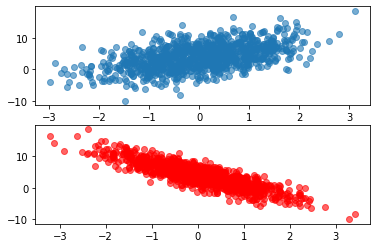

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data_path = r'E:\Python Programma\PythonProject\PyTorch_Learning\04_回归问题实战\data_02.csv'
points = np.genfromtxt(data_path, delimiter=',')
print(points)
x1 = points[:,0]
x2 = points[:,1]
y = points[:,2]
plt.figure()

# 第一个axes
plt.subplot(2, 1, 1)
plt.scatter(x1, y, alpha=0.6)

# 第二个axes
plt.subplot(2, 1, 2)
plt.scatter(x2, y, c='red', alpha=0.6)

plt.show()

建立误差函数模型
$$
f = (w_1x_1+w_2x_2+b-y)^2
$$
回归问题转化为求解该函数的最小值

分别对三个参数进行求导
$$
f'(w_1)=2x_1(w_1x_1+w_2x_2+b-y) \\
f'(w_2)=2x_2(w_1x_1+w_2x_2+b-y) \\
f'(b)=2(w_1x_1+w_2x_2+b-y) \\
$$

In [3]:
def error_function(curr_w1, curr_w2, curr_b, points):
    result = (curr_w1 * points[:,0] + curr_w2 * points[:,1] + curr_b - points[:,2]) ** 2
    return np.mean(result)

def gradient_w_1(curr_w1, curr_w2, curr_b, points):
    result = 2 * points[:,0] * (curr_w1 * points[:,0] + curr_w2 * points[:,1] + curr_b - points[:,2])
    return np.mean(result)

def gradient_w_2(curr_w1, curr_w2, curr_b, points):
    result = 2 * points[:,1] * (curr_w1 * points[:,0] + curr_w2 * points[:,1] + curr_b - points[:,2])
    return np.mean(result)

def gradient_b(curr_w1, curr_w2, curr_b, points):
    result = 2 * (curr_w1 * points[:,0] + curr_w2 * points[:,1] + curr_b - points[:,2])
    return np.mean(result)

- 开始进行梯度下降循环算法

434
w1=2.0002704411848615, w2=-3.400285869785918, b=4.200447204546369


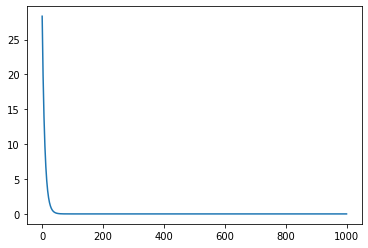

In [6]:
# 定义初值
points_size = len(points)
init_w1, init_w2, init_b = 0, 0, 0
iter_count = 1000
learning_rate = 0.03
error_list = []


w1, w2, b = init_w1, init_w2, init_b
for i in range(iter_count):
    w1 -= gradient_w_1(w1, w2, b, points) * learning_rate
    w2 -= gradient_w_2(w1, w2, b, points) * learning_rate
    b -= gradient_b(w1, w2, b, points) * learning_rate
    error = error_function(w1, w2, b, points)
    error_list.append(error)
    
min_error = min(error_list)
print(error_list.index(min_error))
print(f'w1={w1}, w2={w2}, b={b}')


error_array = np.array(error_list)
index = np.arange(iter_count)
plt.plot(index,error_array)
plt.show()

## 使用pytorch完成上述操作

In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.nn import init

true_w = [2, -3.4]
true_b = 4.2

- 构造神经网络模型的类，直接继承nn.Module

In [11]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

- 读取数据，并转化为tensor类型，注意这里读取的时候必须为float32类型，否则后续操作会失败

In [13]:
m_data = np.genfromtxt(r'E:\Python Programma\PythonProject\PyTorch_Learning\04_回归问题实战\data_02.csv', delimiter=',', dtype=np.float32)
features = torch.from_numpy(m_data[:, :2])
labels = torch.from_numpy(m_data[:, 2])

- 批量分组，这里为什么要进行这操作还不懂，后面懂了再来写 todo

In [13]:
batch_size = 10
dataset = data.TensorDataset(features, labels)  # 共1000组数据
data_iter = data.DataLoader(dataset, batch_size, shuffle=True)  # 共100个批次的数据，每个批次10个数据，并随机打乱

- 构造神经网络对象，包含两个输入维度

In [16]:
net = LinearNet(2)

- 这里定义初始值，其中权重是个随机数，偏移为0

In [17]:
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

- 将均方误差损失作为模型的损失函数

In [18]:
loss = nn.MSELoss()

- 定义优化算法
     - 创建一个用于优化net所有参数的优化器实例，并指定学习率为0.03的小批量随机梯度下降（SGD）为优化算法

In [19]:
optimizer = optim.SGD(net.parameters(), lr=0.03)

- 训练模型

In [20]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        output = net(X)
        ll = loss(output, y.view(-1, 1))
        optimizer.zero_grad()  # 梯度清零，等价于net.zero_grad()
        ll.backward()
        optimizer.step()

dense = net.linear
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9995, -3.4002]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2016], requires_grad=True)
